# Cross Validation in Time Series

This notebook answers the question: 
> DS2: What cross-validation technique would you use on a time series data set?


## Cross Validation (CV)

* Technique we use for tuning hyperparameters
* two most common: 
    - *k*-fold cross validatio
    - hold-out cross validation

## Why CV is different with Time Series?

Traditional techniques will fail because:

### 1. Temporal Dependencies

* data must be split to avoid leakages
* test must only withhold data about events that occur chronologically after the events
* *k*-fold CV will not work in this case
* use hold-out CV but split temporally
* given in image below, the red dots correspond to the test/validate observation which occurs temporally after the blue training observations 

<p align="center">
  <img src="images/cv1-1.png" width="550px">
</p>

### 2. Arbitrary Choice of Test Set

* results in test set error being a poor estimate of error on an independent test set
* use nested cross validation to address this

## Nested Cross Validation

* uses two loops - outer and inner
* outer loop:
    * used for error estimation
    * here data is split into train and test set
* inner loop:
    * parameter tuning
    * data is split into train and validation set
<p align="center">
  <img src="images/1_5vky1z29e1iO6iOvCTBJxg.png" width="550px">
</p>

## Nested CV Methods for a Time Series

### 1. Predict Second Half

* only one train-test split
* suffers from the limitation of an arbitrarily-chosen test set
* the validation set is chronologically subsequent to the training subset
<p align="center">
  <img src="images/1_vsMy_6R3Q-dhLO5OuZ1lJA.png" width="650px">
</p>

### 2. Day Forward-Chaining

* aka rolling-origin-recalibration evaluation
* successively consider each day as the test set and assign all previous data into the training set.
* E.g if our dataset has five days, then we would produce three different training and test splits, as shown below:
<p align="center">
  <img src="images/1_2-zaRQ-dsv8KWxOlzc8VaA.png" width="650px">
</p>

### 3. Regular Day Forward-Chaining

* utilizes day forward-chaining
* but splits now also contain data from each participant in our dataset

### 4. Polpulation-informed Day Forward-Chaining

* takes advantaged of independence between different participants’ data
* the test and validation sets only contain data from one participant and all data from all other participants in the dataset are allowed in the training set

## Monthly Sunspot Dataset

* This dataset describes a monthly count of the number of observed sunspots for just over 230 years (1749-1983).
* The source of the dataset is credited as Andrews & Herzberg (1985).

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data 

series = pd.read_csv('data/monthly-sunspots.csv', header=0, index_col=0)
series.head(5)

,Sunspots
Month,
1749-01,58.0
1749-02,62.6
1749-03,70.0
1749-04,55.7
1749-05,85.0


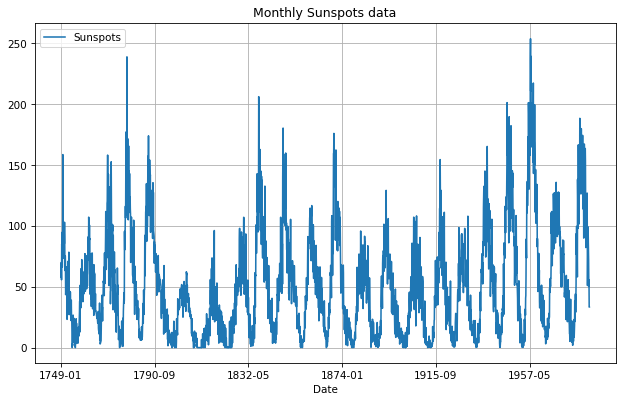

In [3]:
# displaying plot

fig = plt.figure(figsize=(10, 6), dpi=75)
series.plot(ax = plt.gca())
plt.title('Monthly Sunspots data')
plt.xlabel('Date')
plt.grid()
plt.show()

### Train Test Temporal Split

Observations: 2820
Training Observations: 1861
Testing Observations: 959


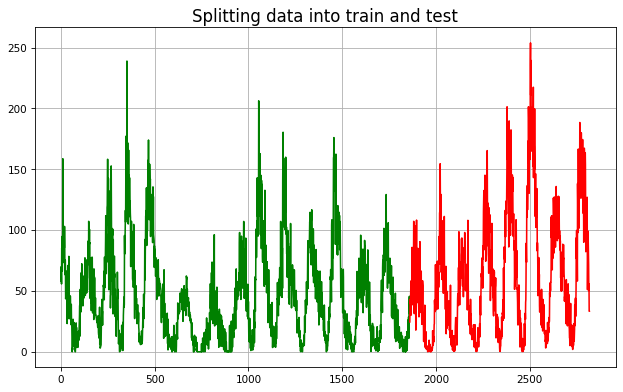

In [4]:
X = series.values

# 66% train set; 34% test size
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

plt.figure(figsize=(10, 6), dpi=75)
plt.plot(train, color = 'green')
plt.plot([None for i in train] + [x for x in test], color = 'red')
plt.title("Splitting data into train and test", fontsize=16)
plt.grid()
plt.show()

### Multple Train-Test Splits for nested CV methods

Observations: 1410
Training Observations: 705
Testing Observations: 705
Observations: 2115
Training Observations: 1410
Testing Observations: 705
Observations: 2820
Training Observations: 2115
Testing Observations: 705


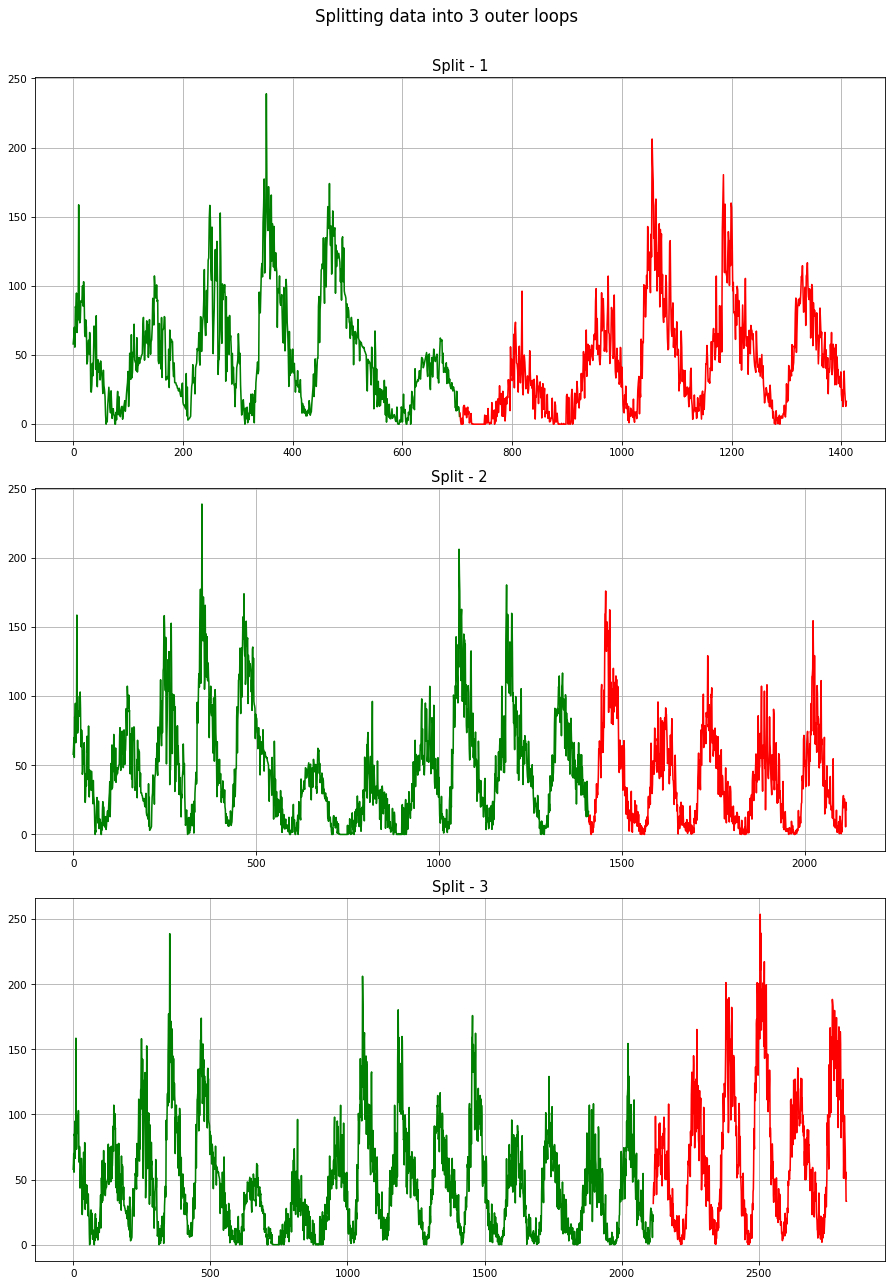

In [5]:
from sklearn.model_selection import TimeSeriesSplit

# three splits for the outer loop
splits = TimeSeriesSplit(n_splits=3)
fig = plt.figure(1, figsize = (12, 6*3), dpi = 75)
fig.suptitle("Splitting data into 3 outer loops", fontsize=16)
index = 1

for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    
    ax = fig.add_subplot(310 + index)
    ax.set_title('Split - {}'.format(str(index)), fontsize=14)
    ax.plot(train, color = 'green')
    ax.grid()
    ax.plot([None for i in train] + [x for x in test], color = 'red')
    index += 1
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Which method to choose?

A comparsion among each method is given in the table below:
<p align="center">
  <img src="images/1_cwoqPsWh_lEUmxmcAL5-rw.png" width="650px">
</p>

Ideally, we would want to choose population-informed day forward-chaining whenever each participant's data is independent of one another. Despite being computationally expensive, it's the most unbiased estimate of generalization error.

## References

1. [TowardsDataScience - Time Series Nested Cross-Validation](https://towardsdatascience.com/time-series-nested-cross-validation-76adba623eb9)
2. [Rob J Hyndman - Cross-validation for time series
](https://robjhyndman.com/hyndsight/tscv/)
3. [Machine Learning Mastery - How To Backtest Machine Learning Models for Time Series Forecasting](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/)